# Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



### Exercise 1
---
Use the sklearn `make_blobs()` function, in the same way that we used in the lesson, to generate a *non linearly separable* dataset with 2 features.  
Fit a linear SVM to the dataset many times, varying the slack hyperparameter $C$, and calculate the model performance in classifying the data.  
What is, approximately, the best value of the $C$ hyperparameter for this dataset?

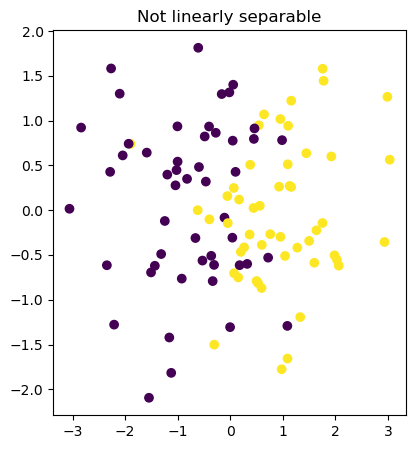

In [39]:
# Non linear Blobs
X_nsep,y_nsep = make_blobs(n_samples=100,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.8)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Not linearly separable')
plt.scatter(X_nsep[:,0],X_nsep[:,1],c=y_nsep)

In [69]:
#Linear model creation with different C values
cs= [0.001,0.005,0.01,0.05,0.1, 0.5,1,5,10,100,1000,10000]
Lperformance=[]


for i in cs:
    clf= svm.SVC(kernel='linear',C=i)
    x_train , x_test, y_train , y_test= train_test_split(X_nsep,y_nsep, random_state=0, test_size=0.2)
    clf.fit(x_train,y_train)
    preds=clf.predict(x_test)
    Lperformance.append(accuracy_score(y_test,preds)*100)

    print('Performance for C=',i,':',accuracy_score(y_test,preds)*100,'%')

Performance for C= 0.001 : 45.0 %
Performance for C= 0.005 : 65.0 %
Performance for C= 0.01 : 90.0 %
Performance for C= 0.05 : 95.0 %
Performance for C= 0.1 : 95.0 %
Performance for C= 0.5 : 95.0 %
Performance for C= 1 : 95.0 %
Performance for C= 5 : 95.0 %
Performance for C= 10 : 95.0 %
Performance for C= 100 : 95.0 %
Performance for C= 1000 : 95.0 %
Performance for C= 10000 : 95.0 %


<font color=blue>As we can see the model performs decently well for C values even as small as 0.01. When we exceed 0.1 though, it reaches its highest performance. </font>

### Exercise 2
---
Repeat exercise 1, but using a non-linear SVM model (the sklearn class `SVC` uses [Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function) as a default, check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)). 
To have a fairer assessment of the performance, train the model on a fraction (e.g. 80%) of the data, and test it on the other 20%.
Compare the performance of a linear SVC and a RBF SVC for dataset that are increaslingly non-linearly-separable.


In [70]:
#Non-Linear model ("RBF") creation with different C values
nLperformance=[]



for i in cs:
    clfnL= svm.SVC(kernel='rbf',C=i)
    x_train , x_test, y_train , y_test= train_test_split(X_nsep,y_nsep, random_state=0, test_size=0.2)
    clfnL.fit(x_train,y_train)
    preds=clfnL.predict(x_test)
    nLperformance.append(accuracy_score(y_test,preds)*100)

    print('Performance for C=',i,':',accuracy_score(y_test,preds)*100,'%')

Performance for C= 0.001 : 45.0 %
Performance for C= 0.005 : 45.0 %
Performance for C= 0.01 : 45.0 %
Performance for C= 0.05 : 65.0 %
Performance for C= 0.1 : 95.0 %
Performance for C= 0.5 : 95.0 %
Performance for C= 1 : 95.0 %
Performance for C= 5 : 95.0 %
Performance for C= 10 : 95.0 %
Performance for C= 100 : 95.0 %
Performance for C= 1000 : 90.0 %
Performance for C= 10000 : 85.0 %


<font color=blue>In this instance, our non linear model struggles at low C values,even at values when our linear one performed well. After C=0.1 it is reliably accurate and above a certain value (C~1000) the accuracy starts dropping again. </font>

### Exercise 3
---
Use the code below to simulate new data.
Generate data and then decode the stimulus identity, see how the decoding performance changes when you change the following:

- The amplitude of the noise in the firing rate 
- The amplitude of the stimulus modulation of the firing rate 
- The number of neurons 

Plot and comment.

## Useful code
---


In [2]:
n_cells = 20; # number of cells to simulate, default=20
n_stim_type = 2; # number of different stimuli
sigma_stim = 0.5 # amplitude of stimulus related modulation,default=0.5
average_firing_rate = 5; # average firing rate across the population

# generate baseline rates from exponential distirbution
cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells)

# create stimulus average responses, perturbing the population firng rate profile
# we use a multiplicative modulation in opposite directions for the two stimuli
modulation = sigma_stim*np.random.normal(0,1,size=n_cells)
cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
# sets negative firng rate to 0
cell_rate_stim[1][cell_rate_stim[1]<0]=0
cell_rate_stim[2][cell_rate_stim[2]<0]=0

In [3]:
# simulate spiking activity


s_rate = 10000 # the sampling rate of our emulated recording system
noise_rate = 1 # we are going to add some spike noise non related to the task ,default=1
n_stim = 100 # number of stimuli

stim_dur = 2 #stimulus duration (in seconds)
is_interval = 3 # interval between stimuli  (in seconds)

stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
np.random.shuffle(stim_type)

time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

spike_times = []
for cell in range(n_cells):
    spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape)
    for i,stimulus in enumerate(stim_type):
        stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
        spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stimulus][cell]/s_rate,size=stim_idxs.shape)

    spike_times.append(time[spikes>0])



In [4]:
# save ouput
out_dict = {'spike_times':spike_times,
            'stim_onsets':stim_onsets,
            'stim_type':stim_type,
            'stim_duration':stim_dur
            }

with open('data/simulated_data1.pickle', 'wb') as handle:
    pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [5]:
onset = -1 # in seconds before stimulus onset
offset = 1 # in second after stimulus offset

binwidth = 0.1 # in seconds (100 ms)
bins = np.arange(onset,stim_dur+offset+binwidth,binwidth)

In [8]:
# Performance according to number of neurons
n_cells1=[1,5,10,15,20]
n_splits=5
Aavg_performance=[]


for i in n_cells1:
    n_trials= len(stim_type)


    X = np.zeros((i,n_trials,len(bins)-1));
    for cell in range(i):    
        for trial in range(n_trials):

            # selects spikes that are in trial
            sp_idx = np.logical_and(spike_times[cell]>stim_onsets[trial]-onset,
                     spike_times[cell]<stim_onsets[trial]+stim_dur+offset)

            # centers spike times around stimulus onset
            sp_cntr = spike_times[cell][sp_idx]-stim_onsets[trial]
            #bins spikes
            spike_count,_ = np.histogram(sp_cntr,bins)
            #spike_count = zscore(spike_count)
            X[cell,trial,:] = spike_count


    avg_performance = []
    std_performance = []
    for time_bin in range(X.shape[-1]):
            # setting 2-fold cross validation
            kf = StratifiedKFold(n_splits=n_splits,shuffle=True,random_state = 0)
            fold_performance = []

            for train_index, test_index in kf.split(X[:,:,time_bin].T,stim_type):


                    X_train, X_test = X[:,train_index,time_bin].T, X[:,test_index,time_bin].T
                    y_train, y_test = stim_type[train_index], stim_type[test_index]

                    clf = svm.LinearSVC(max_iter=2500)
                    clf.fit(X_train, y_train)
                    fold_performance.append(clf.score(X_test,y_test))

            avg_performance.append(np.mean(fold_performance))
            std_performance.append(np.std(fold_performance))

    avg_performance = np.asarray(avg_performance)
    std_performance = np.asarray(std_performance)
    Aavg_performance.append(np.mean(avg_performance))
    print(f'Average performance for {i} neuron(s)',np.mean(avg_performance))


Average performance for 1 neuron(s) 0.53575
Average performance for 5 neuron(s) 0.5762499999999999
Average performance for 10 neuron(s) 0.5885
Average performance for 15 neuron(s) 0.5890000000000001
Average performance for 20 neuron(s) 0.59875


Text(0.5, 1.0, 'Performance according to number of neurons')

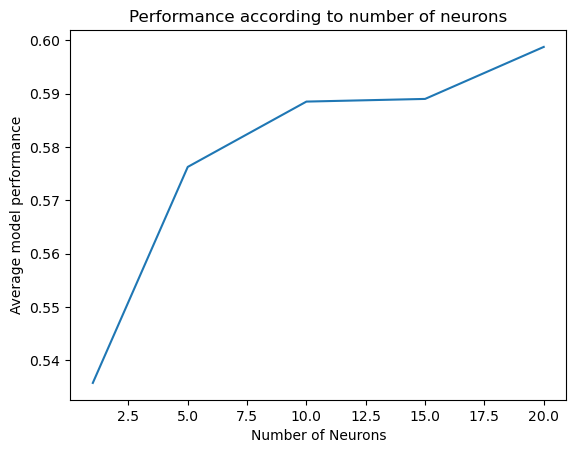

In [9]:
plt.plot(n_cells1,Aavg_performance)
plt.xlabel('Number of Neurons')
plt.ylabel('Average model performance')
plt.title('Performance according to number of neurons')

<font color=blue>For low numbers of neurons our model performs worse. As we incorporate more and more neurons in our model, the performance significantly increases.<font>

In [10]:
#Performance according to the amplitude of the stimulus modulation of the firing rate
n_cells=20
sigma_stim1=[0.1,0.5,1,2,5]
Bavg_performance=[]

for k in sigma_stim1:
    cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells)

    # create stimulus average responses, perturbing the population firng rate profile
    # we use a multiplicative modulation in opposite directions for the two stimuli
    modulation = k*np.random.normal(0,1,size=n_cells)
    cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
    # sets negative firng rate to 0
    cell_rate_stim[1][cell_rate_stim[1]<0]=0
    cell_rate_stim[2][cell_rate_stim[2]<0]=0

    stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
    stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
    np.random.shuffle(stim_type)

    time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

    spike_times = []
    for cell in range(n_cells):
        spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape)
        for i,stimulus in enumerate(stim_type):
            stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
            spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stimulus][cell]/s_rate,size=stim_idxs.shape)

        spike_times.append(time[spikes>0])
    X = np.zeros((n_cells,n_trials,len(bins)-1));
    for cell in range(n_cells):    
        for trial in range(n_trials):

            # selects spikes that are in trial
            sp_idx = np.logical_and(spike_times[cell]>stim_onsets[trial]-onset,
                     spike_times[cell]<stim_onsets[trial]+stim_dur+offset)

            # centers spike times around stimulus onset
            sp_cntr = spike_times[cell][sp_idx]-stim_onsets[trial]
            #bins spikes
            spike_count,_ = np.histogram(sp_cntr,bins)
            #spike_count = zscore(spike_count)
            X[cell,trial,:] = spike_count


    avg_performance = []
    std_performance = []
    for time_bin in range(X.shape[-1]):
            # setting 2-fold cross validation
            kf = StratifiedKFold(n_splits=n_splits,shuffle=True,random_state = 0)
            fold_performance = []

            for train_index, test_index in kf.split(X[:,:,time_bin].T,stim_type):


                    X_train, X_test = X[:,train_index,time_bin].T, X[:,test_index,time_bin].T
                    y_train, y_test = stim_type[train_index], stim_type[test_index]

                    clf = svm.LinearSVC(max_iter=3000)
                    clf.fit(X_train, y_train)
                    fold_performance.append(clf.score(X_test,y_test))

            avg_performance.append(np.mean(fold_performance))
            std_performance.append(np.std(fold_performance))

    avg_performance = np.asarray(avg_performance)
    std_performance = np.asarray(std_performance)
    Bavg_performance.append(np.mean(avg_performance))
    print(f'Average performance for {k} amplitude(s)',np.mean(avg_performance))


Average performance for 0.1 amplitude(s) 0.5197499999999999
Average performance for 0.5 amplitude(s) 0.6244999999999999
Average performance for 1 amplitude(s) 0.623
Average performance for 2 amplitude(s) 0.62275
Average performance for 5 amplitude(s) 0.62975


Text(0.5, 1.0, 'Performance according to amplitude')

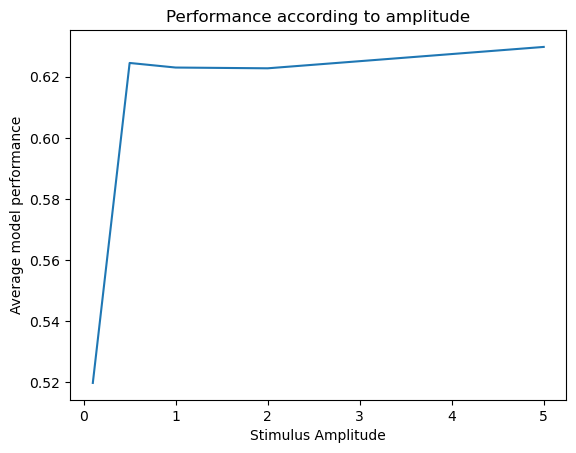

In [11]:
plt.plot(sigma_stim1,Bavg_performance)
plt.xlabel('Stimulus Amplitude')
plt.ylabel('Average model performance')
plt.title('Performance according to amplitude')

<font color=blue>With the stimulus amplitude we can observe the same pattern as with the number of neurons. The bigger the amplitude, the better the performance. For the noise parameter(noise_rate=1), I didn't see it being used anywhere so no matter how much I changed it I saw no difference.</font>